## Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('Train.csv')


## Data Preparation

In [2]:
# Display the shape of the dataset
data.shape


(10999, 12)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
data.isnull()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,False,False,False,False,False,False,False,False,False,False,False,False
10995,False,False,False,False,False,False,False,False,False,False,False,False
10996,False,False,False,False,False,False,False,False,False,False,False,False
10997,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().any()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool

In [6]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
unique_values = {
    'Warehouse_block': data['Warehouse_block'].unique(),
    'Mode_of_Shipment': data['Mode_of_Shipment'].unique(),
    'Product_importance': data['Product_importance'].unique(),
    'Gender': data['Gender'].unique()
}

unique_values


{'Warehouse_block': array(['D', 'F', 'A', 'B', 'C'], dtype=object),
 'Mode_of_Shipment': array(['Flight', 'Ship', 'Road'], dtype=object),
 'Product_importance': array(['low', 'medium', 'high'], dtype=object),
 'Gender': array(['F', 'M'], dtype=object)}

In [8]:
label_map={}
for i in data.columns:
    if str(data[i].dtype) == 'object':
        temp={}
        cats=data[i].unique()
        for index in range(len(cats)):
            temp[cats[index]]=index
        label_map[i]=temp
        #labeling
        data[i]=data[i].map(temp)
label_map



{'Warehouse_block': {'D': 0, 'F': 1, 'A': 2, 'B': 3, 'C': 4},
 'Mode_of_Shipment': {'Flight': 0, 'Ship': 1, 'Road': 2},
 'Product_importance': {'low': 0, 'medium': 1, 'high': 2},
 'Gender': {'F': 0, 'M': 1}}

In [9]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,0,0,4,2,177,3,0,0,44,1233,1
1,2,1,0,4,5,216,2,0,1,59,3088,1
2,3,2,0,2,2,183,4,0,1,48,3374,1
3,4,3,0,3,3,176,4,1,1,10,1177,1
4,5,4,0,2,2,184,3,1,0,46,2484,1


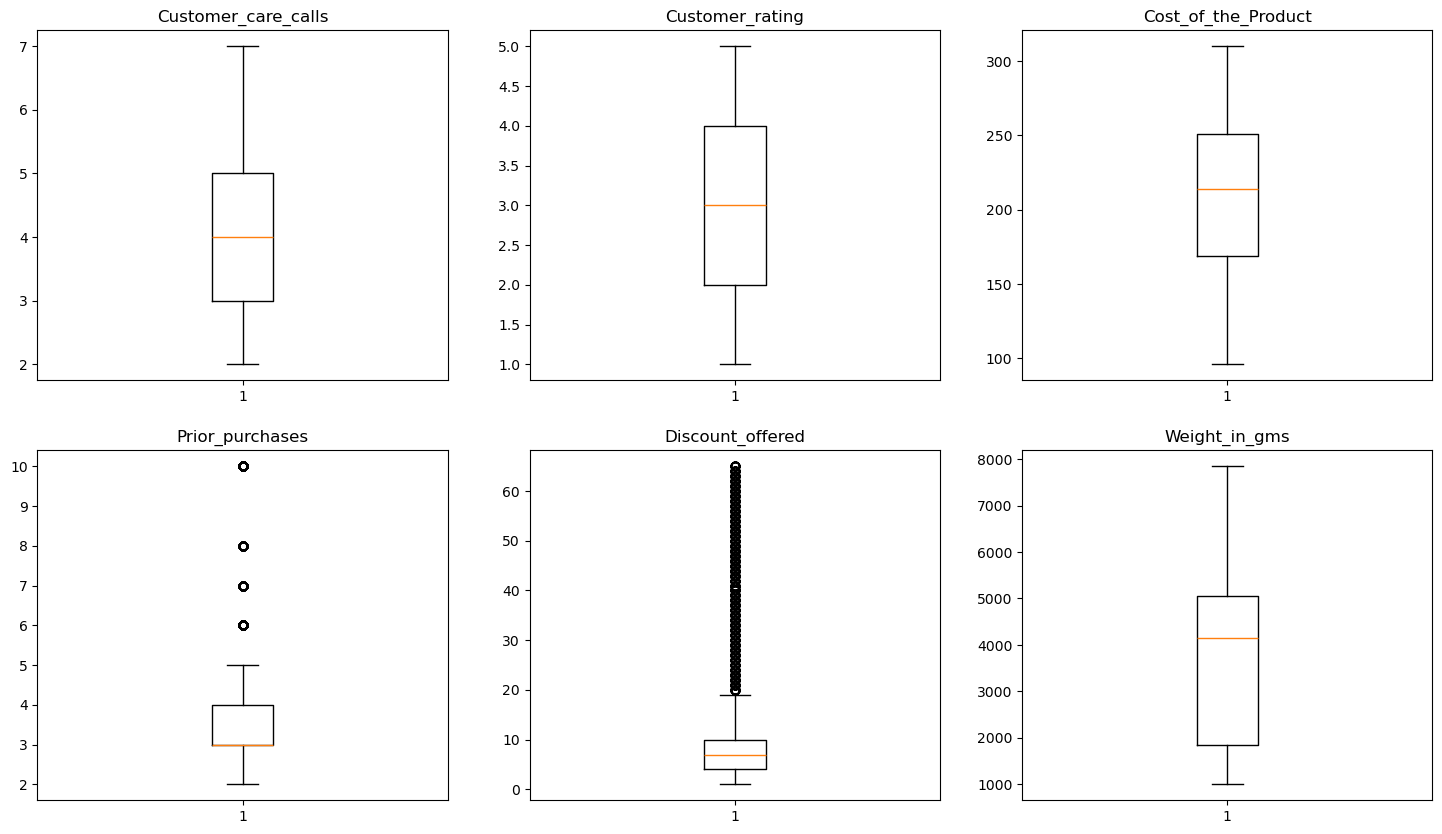

In [10]:
import matplotlib.pyplot as plt

c = 0

plt.figure(figsize=(18, 10))

for i in data.drop(columns=[
    'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N', 'ID'
]).columns:

    if str(data[i].dtype) == 'object':
        continue

    plt.subplot(2, 3, c + 1)

    plt.boxplot(data[i])

    plt.title(i)

    c += 1

plt.show()


In [11]:
def find_bounds(arr):
    Q1 = np.percentile(arr, 25)
    Q3 = np.percentile(arr, 75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    return lower, upper

# Finding bounds for Discount_offered and Prior_purchases
discount_bounds = find_bounds(data['Discount_offered'])
prior_purchases_bounds = find_bounds(data['Prior_purchases'])

print(f"Discount Offered - Lower Bound: {discount_bounds[0]}, Upper Bound: {discount_bounds[1]}")
print(f"Prior Purchases - Lower Bound: {prior_purchases_bounds[0]}, Upper Bound: {prior_purchases_bounds[1]}")





Discount Offered - Lower Bound: -5.0, Upper Bound: 19.0
Prior Purchases - Lower Bound: 1.5, Upper Bound: 5.5


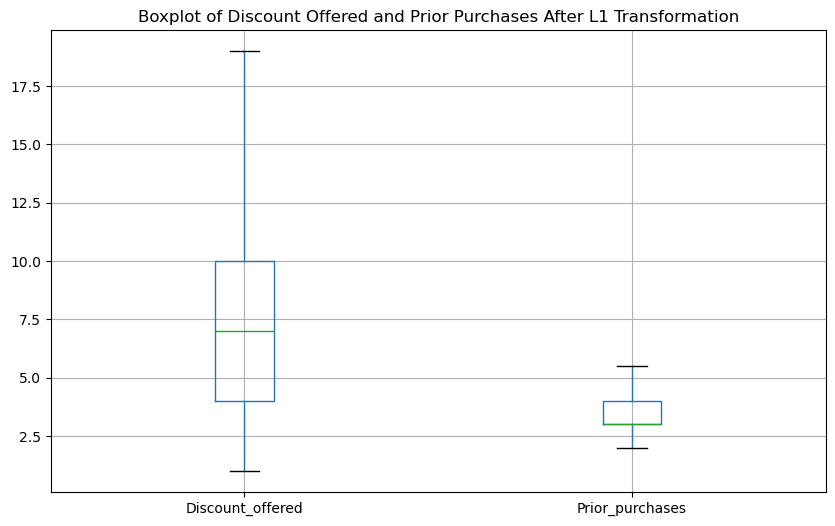

In [12]:
def l1_transformation(arr, lower, upper):
    return np.clip(arr, lower, upper)

data['Discount_offered'] = l1_transformation(data['Discount_offered'], discount_bounds[0], discount_bounds[1])
data['Prior_purchases'] = l1_transformation(data['Prior_purchases'], prior_purchases_bounds[0], prior_purchases_bounds[1])

# Verify transformation
plt.figure(figsize=(10, 6))
data.boxplot(column=['Discount_offered', 'Prior_purchases'])
plt.title('Boxplot of Discount Offered and Prior Purchases After L1 Transformation')
plt.show()


In [13]:
data['Discount_offered']

0        19
1        19
2        19
3        10
4        19
         ..
10994     1
10995     6
10996     4
10997     2
10998     6
Name: Discount_offered, Length: 10999, dtype: int64

## Exploratory Data Analysis

In [14]:
data.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,1.833167,0.998454,4.054459,2.990545,210.196836,3.421629,0.604600,0.495863,8.590963,3634.016729,0.596691
std,3175.28214,1.343823,0.567099,1.141490,1.413603,48.063272,1.136903,0.641464,0.500006,6.095461,1635.377251,0.490584
min,1.00000,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,2750.50000,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,0.000000,0.000000,4.000000,1839.500000,0.000000
50%,5500.00000,1.000000,1.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,8249.50000,3.000000,1.000000,5.000000,4.000000,251.000000,4.000000,1.000000,1.000000,10.000000,5050.000000,1.000000
max,10999.00000,4.000000,2.000000,7.000000,5.000000,310.000000,5.500000,2.000000,1.000000,19.000000,7846.000000,1.000000


In [15]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,0,0,4,2,177,3.0,0,0,19,1233,1
1,2,1,0,4,5,216,2.0,0,1,19,3088,1
2,3,2,0,2,2,183,4.0,0,1,19,3374,1
3,4,3,0,3,3,176,4.0,1,1,10,1177,1
4,5,4,0,2,2,184,3.0,1,0,19,2484,1


C:\Users\Narendar Reddy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Narendar Reddy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Narendar Reddy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Narendar Reddy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

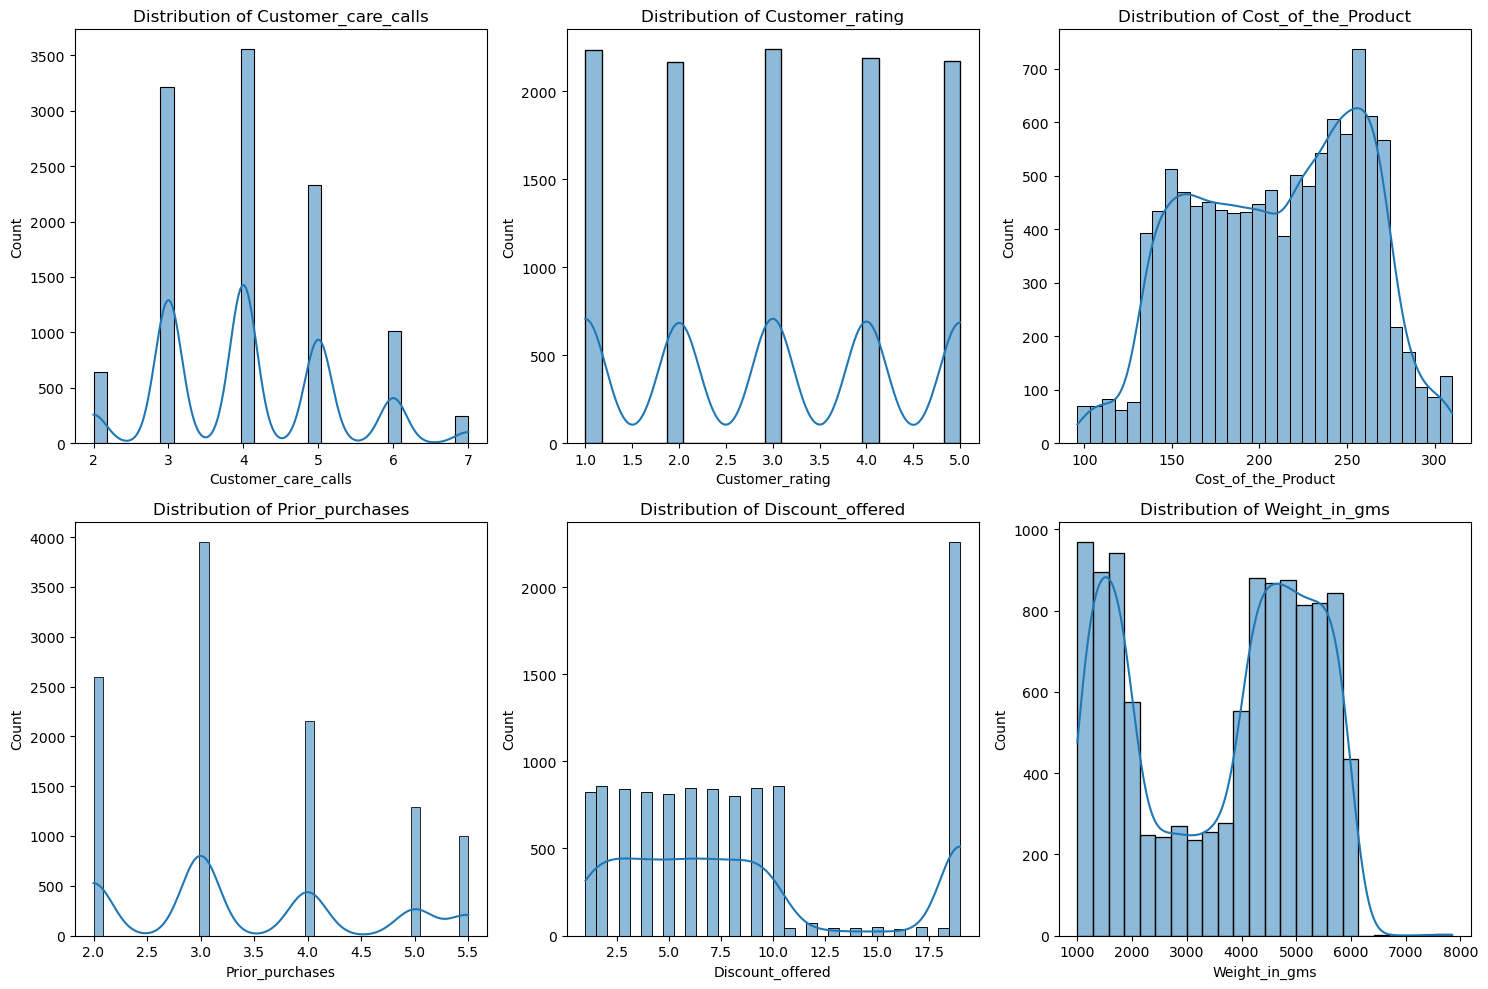

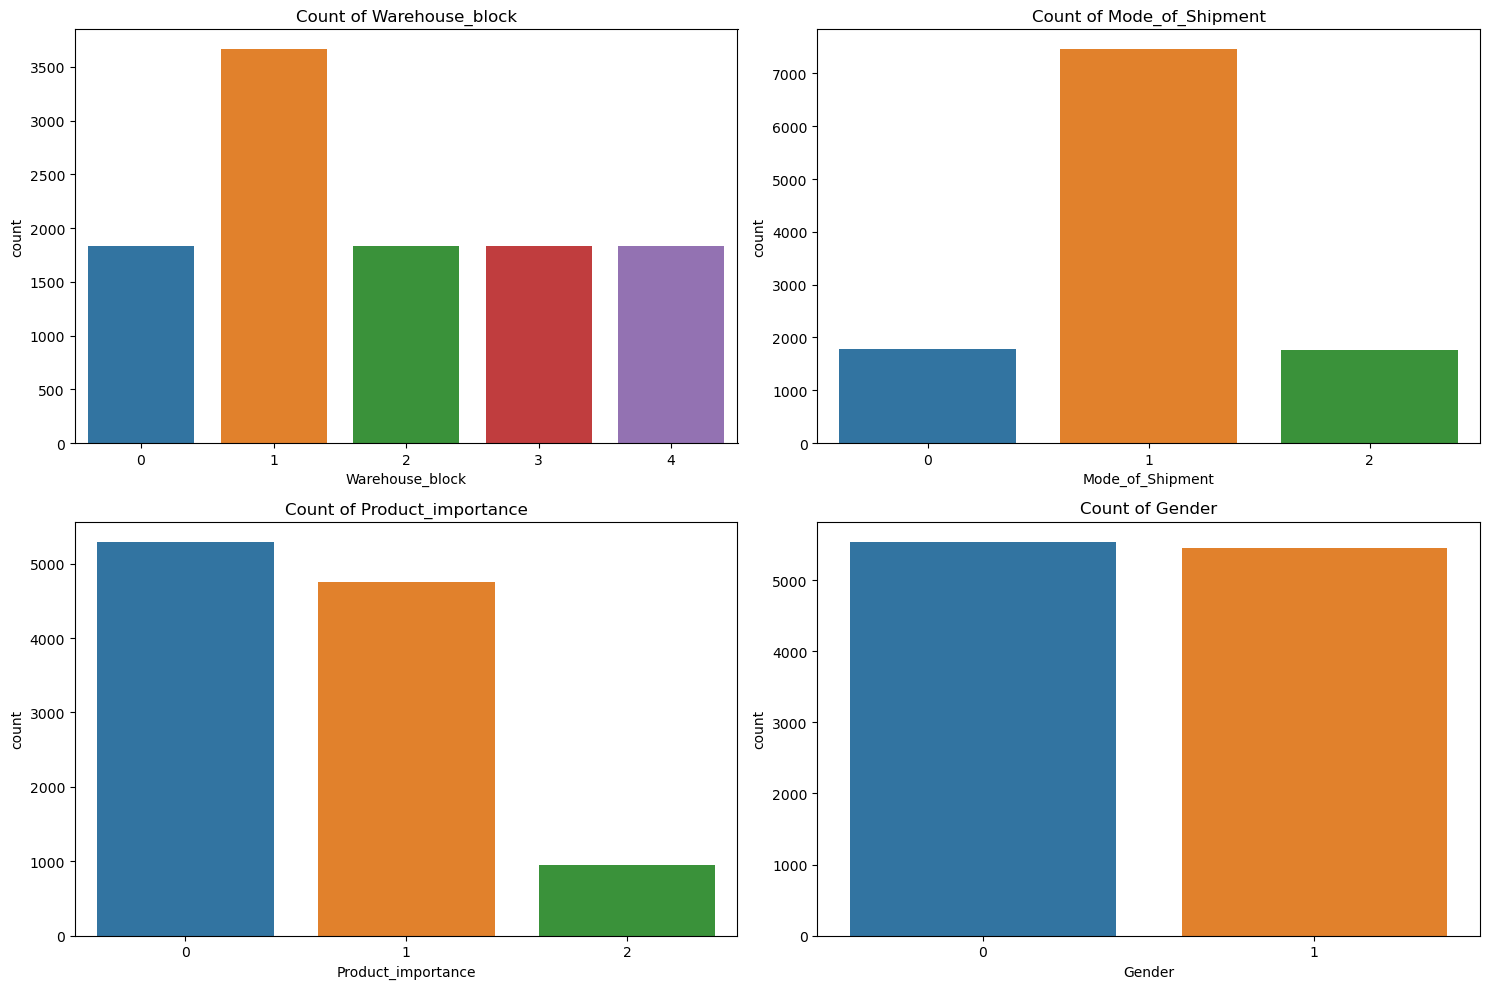

In [16]:

# Plot histograms for continuous variables
continuous_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Plot count plots for categorical variables
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=data[feature])
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()





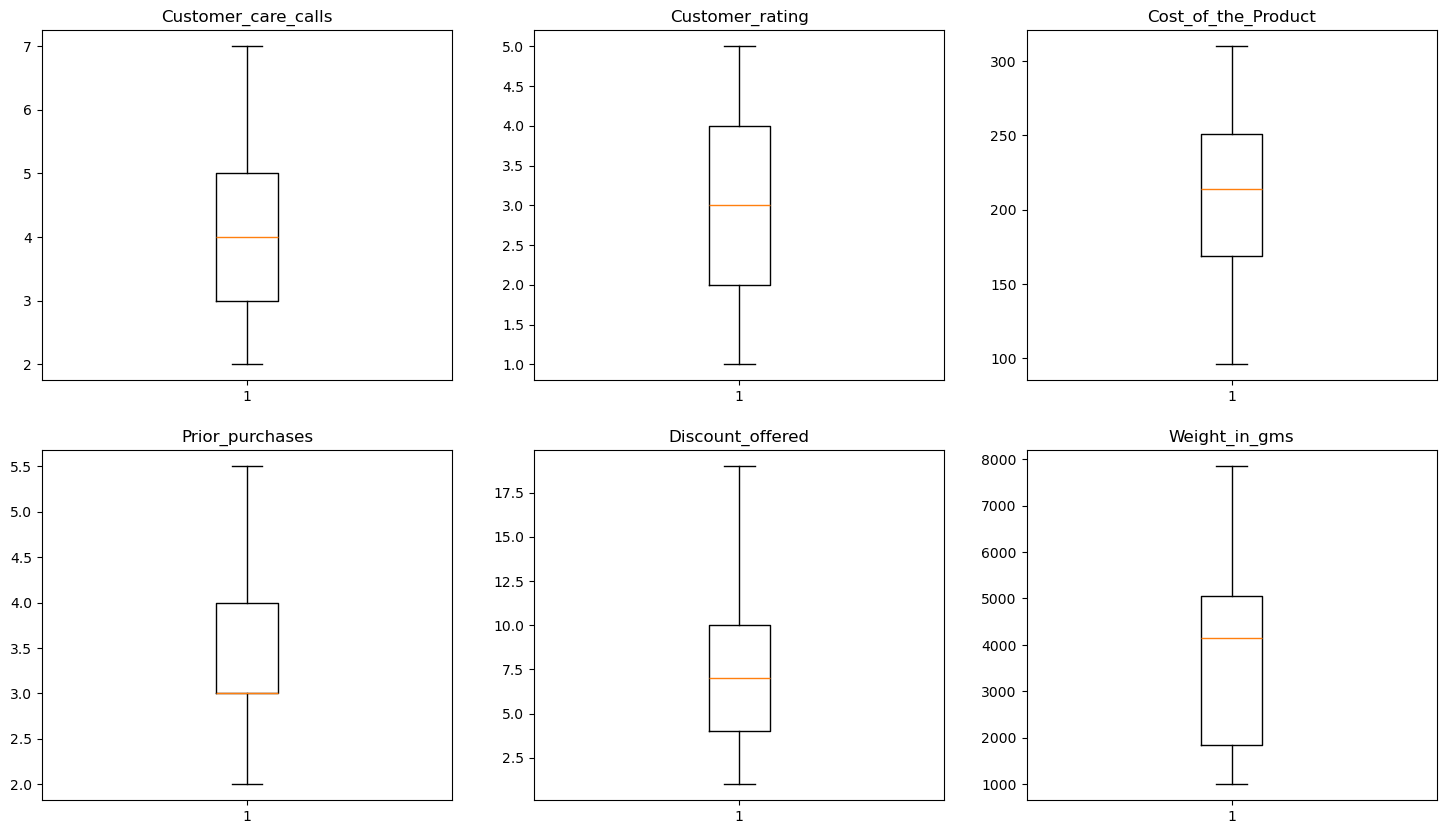

In [17]:
c = 0

plt.figure(figsize=(18, 10))

for i in data.drop(columns=[
    'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N', 'ID'
]).columns:

    if str(data[i].dtype) == 'object':
        continue

    plt.subplot(2, 3, c + 1)

    plt.boxplot(data[i])

    plt.title(i)

    c += 1

plt.show()


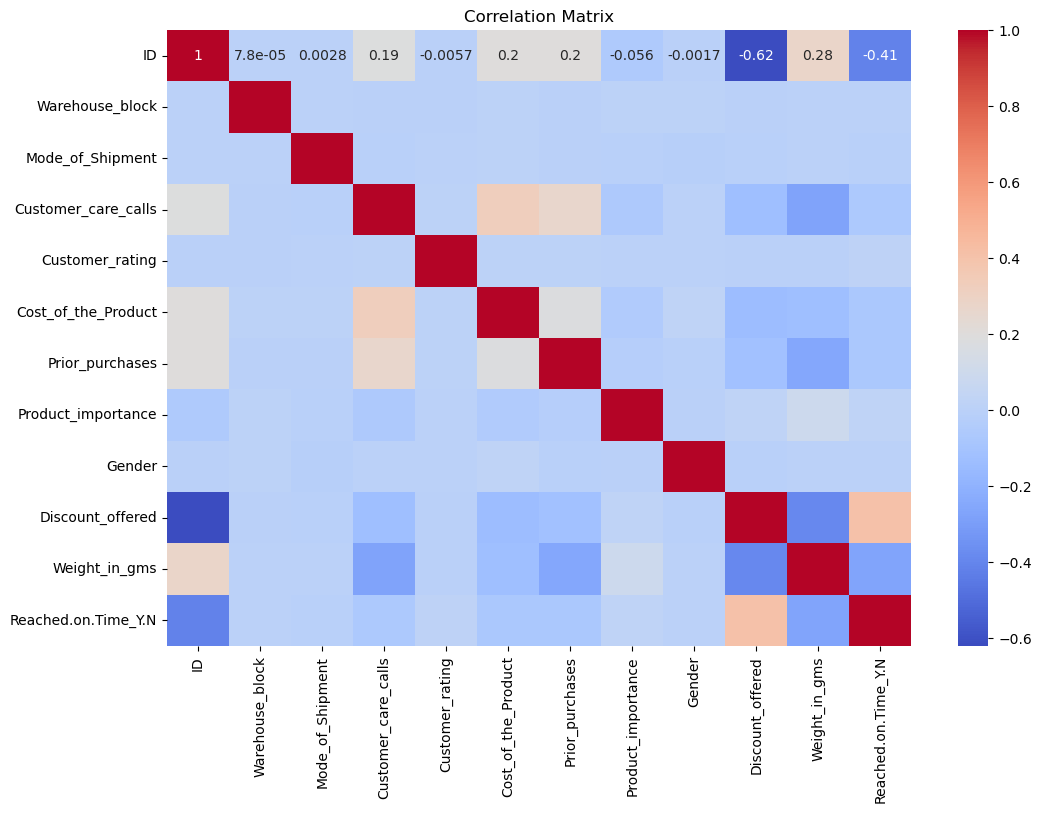

In [18]:
# Plot heatmap to show correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['ID', 'Reached.on.Time_Y.N'])
Y = data['Reached.on.Time_Y.N']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234, shuffle=True)


In [20]:
X_train.shape

(8799, 10)

In [21]:
X_test.shape

(2200, 10)

In [22]:
Y_train.shape

(8799,)

In [23]:
Y_test.shape

(2200,)

In [24]:
from sklearn.preprocessing import Normalizer

# Initialize the normalizer
normalizer = Normalizer(norm='l1')

# Fit and transform the training data
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

# Convert normalized data back to a DataFrame for ease of use
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

# Verify the normalization
print(X_train_normalized.describe())
print(X_test_normalized.describe())


       Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
count      8799.000000       8799.000000          8799.000000   
mean          0.000613          0.000332             0.001401   
std           0.000619          0.000283             0.001018   
min           0.000000          0.000000             0.000249   
25%           0.000189          0.000174             0.000685   
50%           0.000472          0.000229             0.000938   
75%           0.000782          0.000473             0.001904   
max           0.003431          0.001699             0.005452   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
count      8799.000000          8799.000000      8799.000000   
mean          0.000991             0.070023         0.001189   
std           0.000775             0.044056         0.000889   
min           0.000160             0.016150         0.000319   
25%           0.000465             0.038016         0.000543   
50%           0.000765        

In [25]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

def models_eval_m(X_train, Y_train, X_test, Y_test):
    lg = LogisticRegression(random_state=1234)
    lg.fit(X_train, Y_train)
    Y_pred = lg.predict(X_test)
    print(' -- Logistic Regression')
    print('Train Score: ', lg.score(X_train, Y_train))
    print('Test Score: ', lg.score(X_test, Y_test))
    print()

    lcv = LogisticRegressionCV(random_state=1234)
    lcv.fit(X_train, Y_train)
    Y_pred = lcv.predict(X_test)
    print(' -- Logistic Regression CV')
    print('Train Score: ', lcv.score(X_train, Y_train))
    print('Test Score: ', lcv.score(X_test, Y_test))
    print()

    xgb = XGBClassifier(random_state=1234)
    xgb.fit(X_train, Y_train)
    Y_pred = xgb.predict(X_test)
    print(' -- XGBoost')
    print('Train Score: ', xgb.score(X_train, Y_train))
    print('Test Score: ', xgb.score(X_test, Y_test))
    print()

    rg = RidgeClassifier(random_state=1234)
    rg.fit(X_train, Y_train)
    Y_pred = rg.predict(X_test)
    print(' -- Ridge Classifier')
    print('Train Score: ', rg.score(X_train, Y_train))
    print('Test Score: ', rg.score(X_test, Y_test))
    print()

    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    print(' -- KNN')
    print('Train Score: ', knn.score(X_train, Y_train))
    print('Test Score: ', knn.score(X_test, Y_test))
    print()

    rf = RandomForestClassifier(random_state=1234)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    print(' -- Random Forest')
    print('Train Score: ', rf.score(X_train, Y_train))
    print('Test Score: ', rf.score(X_test, Y_test))
    print()

    svc = SVC(random_state=1234)
    svc.fit(X_train, Y_train)
    Y_pred = svc.predict(X_test)
    print(' -- SVM classifier')
    print('Train Score: ', svc.score(X_train, Y_train))
    print('Test Score: ', svc.score(X_test, Y_test))
    print()

    return lg, lcv, xgb, rg, knn, rf, svc

# Example usage:
# Replace 'x_train', 'y_train', 'x_test', 'y_test' with your actual data variables
# models_eval_m(x_train, y_train, x_test, y_test)


In [26]:
lg, lcv, xgb, rg, knn, rf, svc =models_eval_m(X_train_normalized,Y_train,X_test_normalized,Y_test)
   




 -- Logistic Regression
Train Score:  0.5976815547221275
Test Score:  0.5927272727272728

 -- Logistic Regression CV
Train Score:  0.6329128310035231
Test Score:  0.6345454545454545

 -- XGBoost
Train Score:  0.9496533697011024
Test Score:  0.649090909090909

 -- Ridge Classifier
Train Score:  0.5976815547221275
Test Score:  0.5927272727272728

 -- KNN
Train Score:  0.7787248550971702
Test Score:  0.6331818181818182

 -- Random Forest
Train Score:  1.0
Test Score:  0.6668181818181819

 -- SVM classifier
Train Score:  0.5976815547221275
Test Score:  0.5927272727272728



In [27]:
lg_preds = lg.predict(X_test)

In [28]:
lg_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
lcv_preds = lcv.predict(X_test)
xgb_preds = xgb.predict(X_test)
rg_preds = rg.predict(X_test)
knn_preds = knn.predict(X_test)
rf_preds = rf.predict(X_test)
svc_preds = svc.predict(X_test)

# Optionally, print or use the predictions
print("Logistic Regression Predictions:", lg_preds)
print("Logistic Regression CV Predictions:", lcv_preds)
print("XGBoost Predictions:", xgb_preds)
print("Ridge Classifier Predictions:", rg_preds)
print("KNN Predictions:", knn_preds)
print("Random Forest Predictions:", rf_preds)
print("SVM Predictions:", svc_preds)

Logistic Regression Predictions: [0 0 0 ... 0 0 0]
Logistic Regression CV Predictions: [0 0 0 ... 0 0 0]
XGBoost Predictions: [1 1 1 ... 1 1 1]
Ridge Classifier Predictions: [0 0 0 ... 0 0 0]
KNN Predictions: [1 1 1 ... 1 1 1]
Random Forest Predictions: [1 1 1 ... 1 1 1]
SVM Predictions: [0 0 0 ... 0 0 0]


## Hyperparameter Optimisation for SVM

In [83]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.metrics")




In [73]:

model_dict = {
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'LogisticRegressionCV': (LogisticRegressionCV(), {'Cs': [1, 10, 100]}),
    'XGBoost': (XGBClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
    'Ridge Classifier': (RidgeClassifier(), {'alpha': [0.1, 1, 10]}),
    'Knn': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}),
    'Support Vector Classifier': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})
}

In [76]:
def eval_model(name, model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_normalized, Y_train)
    best_model = grid_search.best_estimator_
    Y_pred = best_model.predict(X_test_normalized)
    result = []
    result.append(name)
    result.append("{: .2f}".format(accuracy_score(Y_test, Y_pred) * 100))
    result.append("{: .2f}".format(f1_score(Y_test, Y_pred, average='weighted') * 100))
    result.append("{: .2f}".format(recall_score(Y_test, Y_pred, average='weighted') * 100))
    result.append("{: .2f}".format(precision_score(Y_test, Y_pred, average='weighted') * 100))
    return result


In [52]:
model_list={
    'LogisticRegression':lg,
    'LogisticRegressionCV':lcv,
    'XGBoost':xgb,
    'Ridge Classifier':rg,
    'Knn':knn,
    'Random Forest':rf,
    'Support Vector Classifier':svc}

In [84]:
model_eval_info = []

for name, (model, param_grid) in model_dict.items():
    model_eval_info.append(eval_model(name, model, param_grid))

model_eval_info_df = pd.DataFrame(model_eval_info, columns=['Name', 'Accuracy', 'f1_score', 'Recall', 'Precision'])
model_eval_info_df.to_csv('model_eval.csv', index=False)

print(model_eval_info_df)

                        Name Accuracy f1_score  Recall Precision
0         LogisticRegression    59.27    44.12   59.27     35.13
1       LogisticRegressionCV    63.45    63.61   63.45     63.84
2                    XGBoost    67.68    67.74   67.68     72.06
3           Ridge Classifier    60.95    52.94   60.95     60.20
4                        Knn    64.09    64.32   64.09     64.80
5              Random Forest    67.59    67.54   67.59     72.79
6  Support Vector Classifier    65.86    66.12   65.86     66.83


In [87]:
import pickle as pkl

In [95]:
pkl.dump(rf,open('rf_acc_67.pkl','wb'))

In [96]:
pkl.dump(normalizer,open('normalizer.pkl','wb'))

In [97]:
from sklearn.preprocessing import StandardScaler
import pickle

# Save the normalizer to a file
with open('rf_acc_67.pkl', 'wb') as f:
    pickle.dump(normalizer, f)


In [98]:
with open('normalizer.pkl', 'wb') as f:
    pickle.dump(normalizer, f)